In [1]:
pwd

'C:\\Users\\duasp\\Machine Learning'

In [2]:
inpDir = '../input'

In [3]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from scipy.integrate import simpson
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression


C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

NOISE = 0.2
N_SAMPLE = 1024

<Figure size 640x480 with 0 Axes>

In [5]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [6]:
iris_file = os.path.join(inpDir, 'iris.csv')
iris_features = ['sepal length',
                'sepal width',
                'petal length',
                'petal width','target']     # create list containing all column names
iris_df = pd.read_csv(iris_file,
                      skiprows = 1,        # ignore first row
                      sep = ',',            # using separator as ,
                      header = None,       # no column names
                      names = iris_features)       # use these column names
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
iris_df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [9]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,1.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [10]:
for col in iris_df.columns:
    print(col, iris_df[col].unique(),'\n')

sepal length [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9] 

sepal width [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6] 

petal length [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2] 

petal width [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3] 

target [0 1 2] 



In [11]:
features_df = iris_df.drop('target', axis = 1)
labels = iris_df.target

In [12]:
features_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

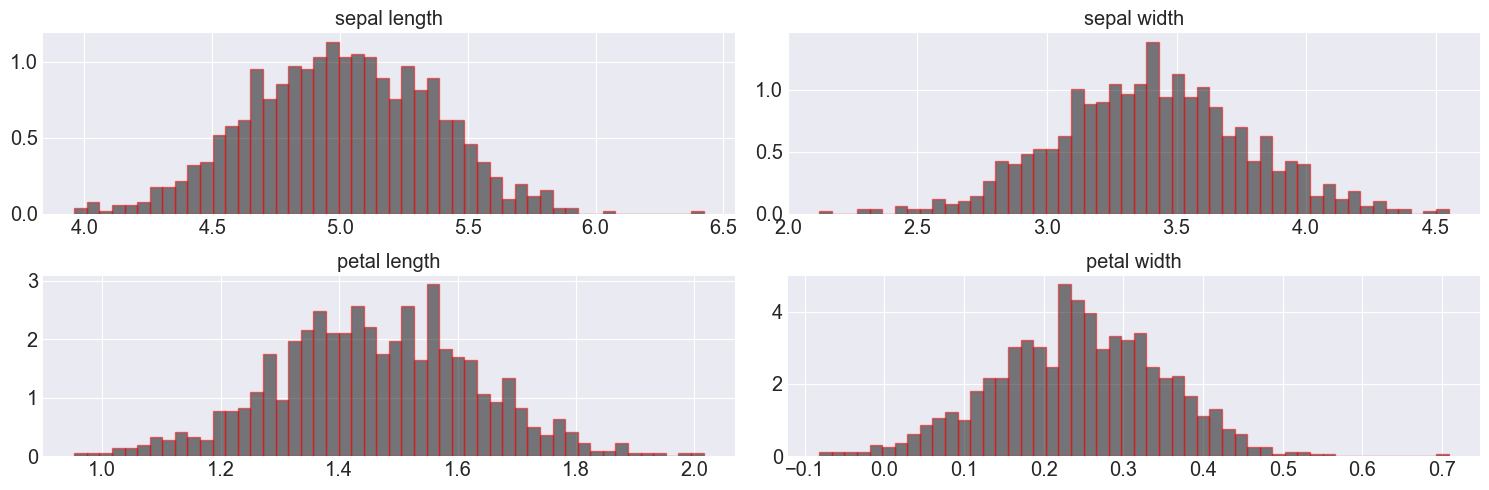

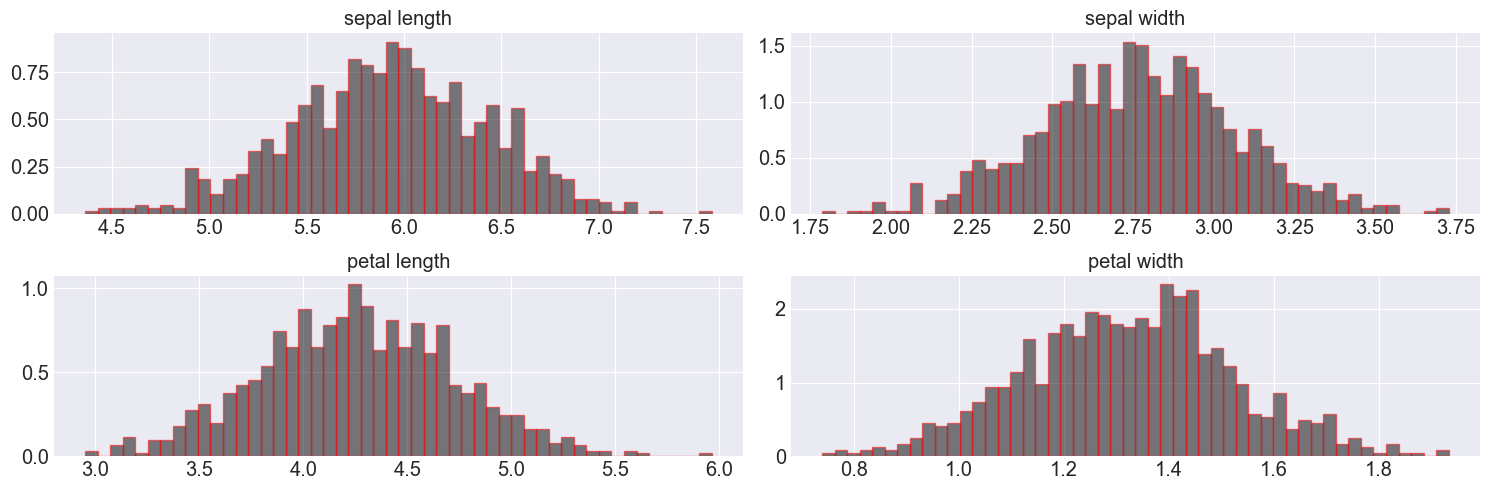

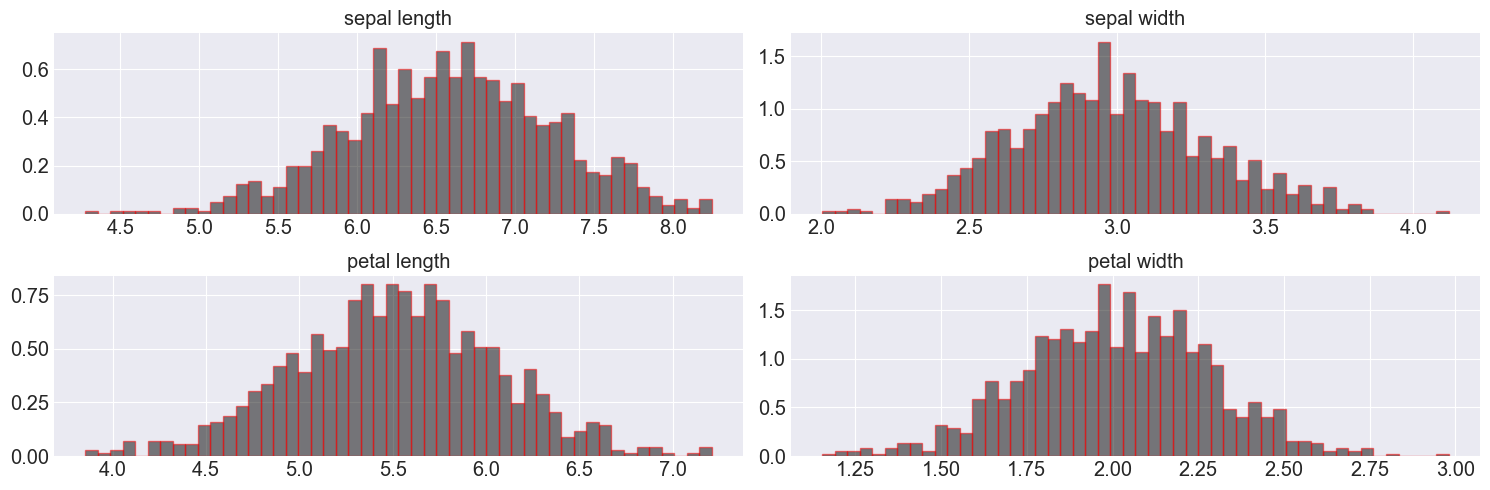

In [14]:
mu, std_dev = {}, {}

for lbl in labels.unique():
    
    tmp_df = iris_df[iris_df['target'] ==lbl]
    
    tmp_df = tmp_df.drop('target',axis = 1)
    
    nSamples = N_SAMPLE
    
    fig, axes = plt.subplots(2,2)
    axes = axes.ravel()
    pdf = {}
    
    for count , col in enumerate(tmp_df.columns): # iterate over all columns/features
        
        mu[col] = tmp_df[col].mean() # calculate mean
        std_dev[col] = tmp_df[col].std() # calculate std dev
        ax = axes[count]
        data = np.random.normal(mu[col], std_dev[col], nSamples)
        ax.hist(data, bins = 50, density=True, alpha = 0.5, color='black',edgecolor = 'red')
        ax.set_title(col)
    plt.tight_layout()

C:\Users\duasp\AppData\Local\Temp\ipykernel_15844\2505690761.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, pdf, 'r-', lw = 2,color='gold')


0.04538959059205931
0.5736143870495231
1.0133390358971727e-95
6.753703472451379e-46


C:\Users\duasp\AppData\Local\Temp\ipykernel_15844\2505690761.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, pdf, 'r-', lw = 2,color='gold')


0.7710101202357021
0.9718584132539116
0.1717982477055382
0.11408115120771109


C:\Users\duasp\AppData\Local\Temp\ipykernel_15844\2505690761.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, pdf, 'r-', lw = 2,color='gold')


0.34940711315643136
1.2330295149586672
0.5168935071010351
1.03537671228938


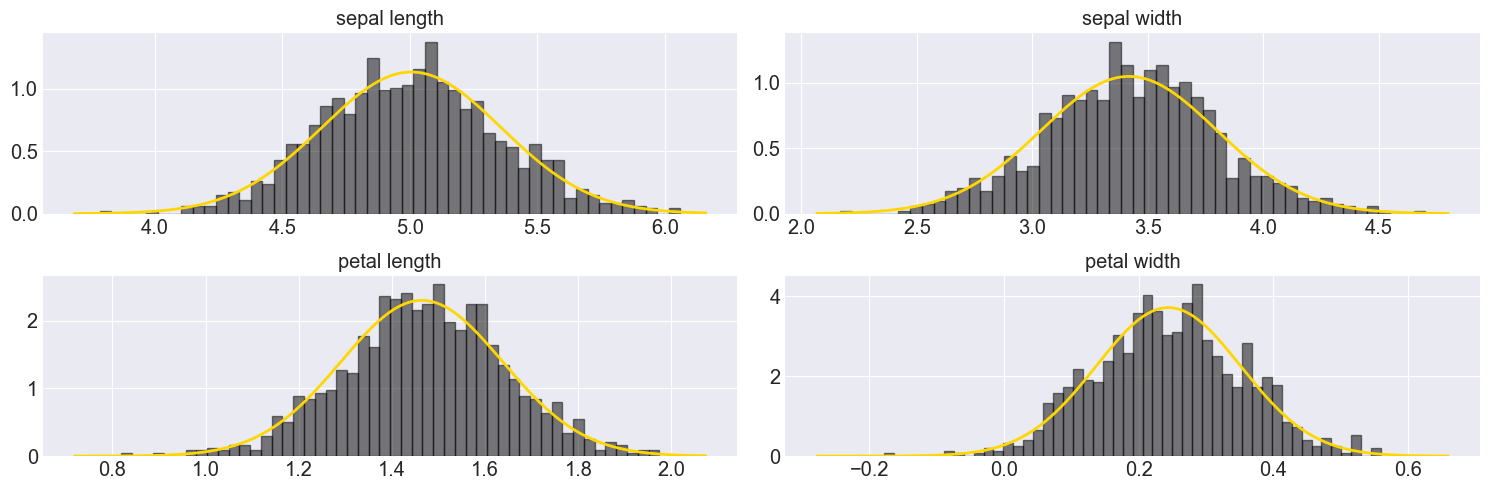

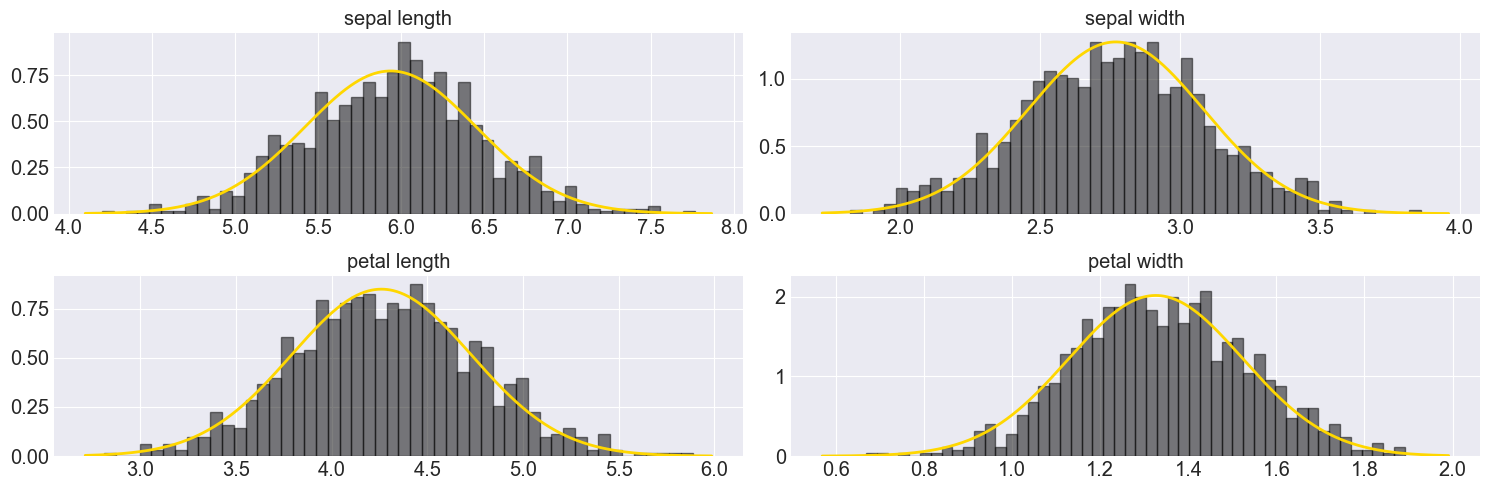

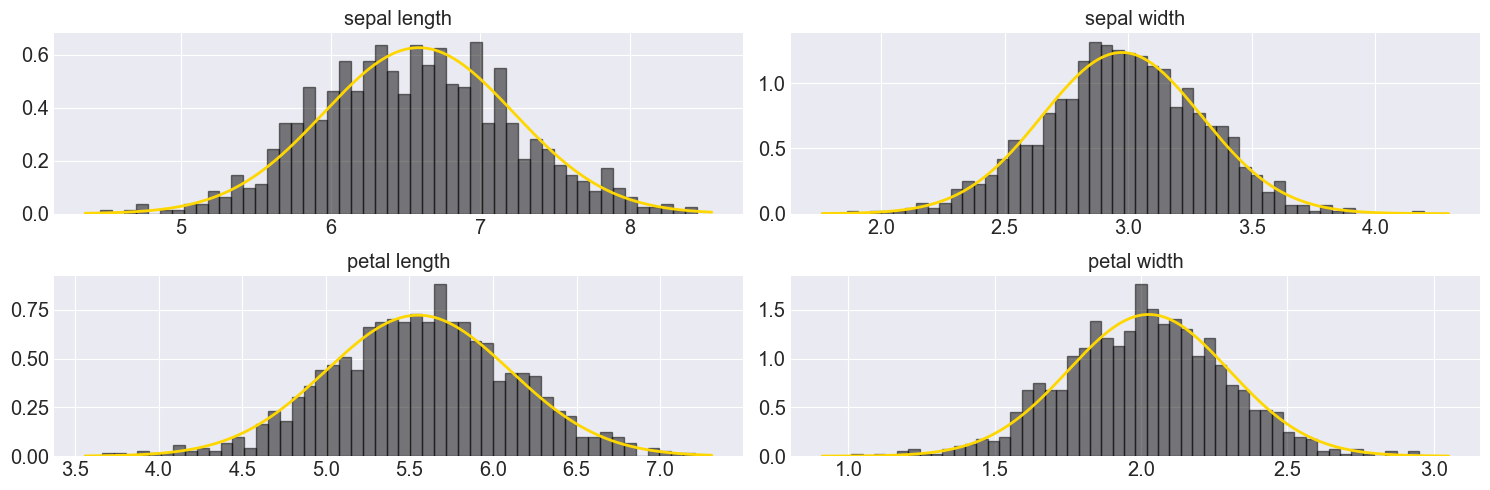

In [15]:
mu, std_dev = {}, {}

for lbl in labels.unique():
    
    tmp_df = iris_df[iris_df['target'] ==lbl]
    
    tmp_df = tmp_df.drop('target',axis = 1)
    
    nSamples = N_SAMPLE
    
    fig, axes = plt.subplots(2,2)
    axes = axes.ravel()
    pdf_col = {}
    
    for count , col in enumerate(tmp_df.columns): # iterate over all columns/features
        
        mu[col] = tmp_df[col].mean() # calculate mean
        std_dev[col] = tmp_df[col].std() # calculate std dev
        ax = axes[count]
        data = np.random.normal(mu[col], std_dev[col], nSamples)
        ax.hist(data, bins = 50, density=True, alpha = 0.5, color='black',edgecolor = 'black')
        ax.set_title(col)
        x = np.linspace(data.min()-0.1, data.max() +0.1, nSamples)
        pdf = norm.pdf(x, mu[col], std_dev[col])
        ax.plot(x, pdf, 'r-', lw = 2,color='gold')
        
        val = features_df.iloc[-1][col]
        pdf_val = norm.pdf(val, mu[col], std_dev[col])
        pdf_col[col] = pdf_val
        
        print(pdf_val)
        
        
    plt.tight_layout()

In [16]:
pdf_col

{'sepal length': 0.34940711315643136,
 'sepal width': 1.2330295149586672,
 'petal length': 0.5168935071010351,
 'petal width': 1.03537671228938}

In [17]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(features_df, labels)
y_pred = clf.predict(features_df)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
xplot = iris_df.keys()[0]

yplot = iris_df.keys()[1]
x_err = iris_df[xplot][(labels != y_pred)]

y_err = iris_df[yplot][(labels != y_pred)]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features_df, labels,
                                                   stratify=labels,
                                                   test_size=TEST_SIZE,
                                                   random_state=RANDOM_STATE)
x_train, x_test, y_train, y_test

(     sepal length  sepal width  petal length  petal width
 20            5.4          3.4           1.7          0.2
 21            5.1          3.7           1.5          0.4
 27            5.2          3.5           1.5          0.2
 11            4.8          3.4           1.6          0.2
 89            5.5          2.5           4.0          1.3
 ..            ...          ...           ...          ...
 129           7.2          3.0           5.8          1.6
 111           6.4          2.7           5.3          1.9
 121           5.6          2.8           4.9          2.0
 110           6.5          3.2           5.1          2.0
 48            5.3          3.7           1.5          0.2
 
 [120 rows x 4 columns],
      sepal length  sepal width  petal length  petal width
 135           7.7          3.0           6.1          2.3
 52            6.9          3.1           4.9          1.5
 0             5.1          3.5           1.4          0.2
 1             4.9          3

In [21]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
y_train = y_train.to_numpy()

x_test = scaler.transform(x_test)
y_test = y_test.to_numpy()

In [22]:
clf = LogisticRegression(penalty = None,
                        multi_class = 'ovr',
                        random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

y_pred = np.hstack([clf.predict(x_train),y_pred])
y = np.hstack([y_train,y_test])

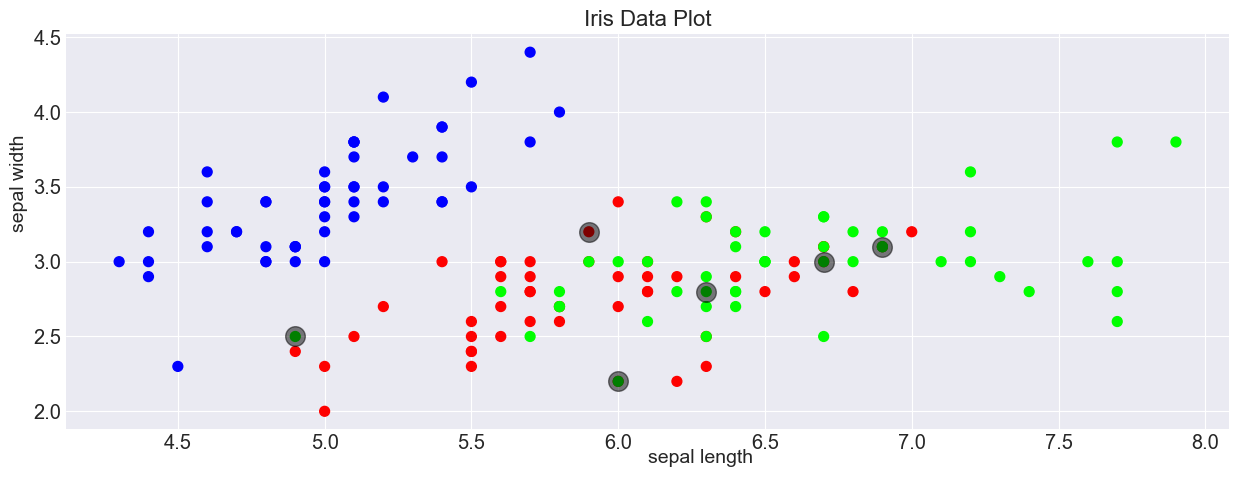

In [23]:
fig = plt.figure()

ax = fig.add_subplot(111)

title = 'Iris Data Plot'

plt.scatter(iris_df[xplot], iris_df[yplot], s = 50,
           c = iris_df['target'],
           cmap =plt.cm.brg)

plt.scatter(x_err, y_err , color = 'black', label = "mismatch",
           s = 200, alpha = 0.5, edgecolor = 'black')

ax.grid(True)

ax.set_title(title, fontsize = 16, ha = 'center')

plt.subplots_adjust(top = 0.9)

ax.title.set_position((0.5,1))

ax.xaxis.set_label_position('bottom')

ax.set_xlabel(xplot, fontsize = 14, ha = 'left')

ax.xaxis.set_label_coords(0.5, -0.05)

ax.set_ylabel(yplot, fontsize = 14, ha = 'left');

In [24]:
accuracy_score(y, y_pred)

0.9733333333333334

In [25]:
accuracy_score(labels, y_pred)

0.4

In [26]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha = 0.1)

clf.fit(features_df, labels)

y_pred = clf.predict(features_df)

accuracy_score(labels, y_pred)

0.9533333333333334

In [27]:
X, y = datasets.make_moons(n_samples = N_SAMPLE, noise = NOISE, random_state = RANDOM_STATE, shuffle = True)

In [28]:
X.shape, y.shape

((1024, 2), (1024,))

In [29]:
np.unique(y)

array([0, 1], dtype=int64)

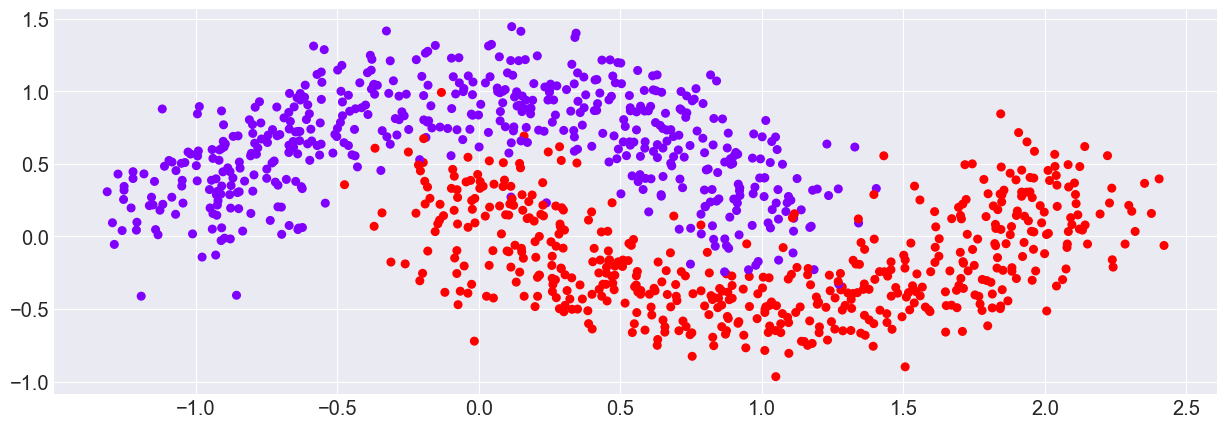

In [30]:
plt.scatter(X[:, 0], X[:,1], s = 30, c = y, cmap = CMAP)

In [31]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

clf.fit(X, y)

y_pred = clf.predict(X)

accuracy_score(y, y_pred)

0.8076171875

In [32]:
data_df = pd.DataFrame(X)
data_df['target'] = y
data_df

,0,1,target
0,0.53,-0.05,1
1,-0.26,-0.19,1
2,-0.85,0.69,0
3,1.03,0.06,0
4,0.98,0.34,0
...,...,...,...
1019,-0.91,0.86,0
1020,-0.35,0.45,0
1021,0.82,1.11,0
1022,1.53,-0.05,1
